In [46]:
import pandas as pd
import numpy as np
import scipy as scp
from scipy import stats
from scipy.stats import pearsonr
import matplotlib as plt
%matplotlib inline
from matplotlib import pyplot

In [47]:
data= pd.read_csv("D:/My Folder/ION/Assignment file for Data Analyst - assignment file.csv")

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31104 entries, 0 to 31103
Data columns (total 12 columns):
Timestamp                             31104 non-null float64
Current                               31104 non-null int64
Total voltage                         31104 non-null float64
SOC                                   31104 non-null float64
Temperature                           31104 non-null float64
SOH                                   31104 non-null float64
Equivalent cycle                      31104 non-null float64
Application status                    31104 non-null int64
Grid status                           31104 non-null int64
Grid power                            31104 non-null float64
Grid energy consumption               31104 non-null float64
Grid cumulative energy consumption    31104 non-null float64
dtypes: float64(9), int64(3)
memory usage: 2.8 MB


In [50]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Timestamp,31104.0,1.572253e+12,8.979096e+09,1.556700e+12,1.564480e+12,1.572250e+12,1.580030e+12,1.587800e+12
Current,31104.0,-3.858025e-03,3.317085e+01,-3.000000e+02,0.000000e+00,0.000000e+00,1.000000e+01,1.000000e+01
Total voltage,31104.0,6.427220e+01,1.918436e+00,4.816035e+01,6.370021e+01,6.529974e+01,6.534454e+01,6.672000e+01
SOC,31104.0,8.289451e-01,1.340328e-01,-1.557136e-01,7.817417e-01,9.019145e-01,9.050290e-01,1.000000e+00
Temperature,31104.0,2.791573e+01,1.330807e+01,2.026328e+01,2.227295e+01,2.606085e+01,2.952342e+01,1.361182e+02
SOH,31104.0,9.482256e-01,1.963543e-02,9.193983e-01,9.320675e-01,9.451872e-01,9.631542e-01,1.000000e+00
Equivalent cycle,31104.0,5.256384e+01,3.130174e+01,0.000000e+00,2.443846e+01,5.249951e+01,7.724166e+01,1.078477e+02
Application status,31104.0,9.999678e-01,5.670115e-03,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Grid status,31104.0,9.881366e-01,1.082731e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Grid power,31104.0,2.214946e+02,2.991291e+02,0.000000e+00,0.000000e+00,0.000000e+00,6.174105e+02,6.540143e+02


In [51]:
pair1=stats.pointbiserialr(data['SOC'],data['Grid status'])

In [52]:
print(pair1)

PointbiserialrResult(correlation=0.22794666128547855, pvalue=0.0)


In [58]:
dmean= data.SOC.groupby(data['Grid status']).mean()
dmax=data.SOC.groupby(data['Grid status']).max()
dmin=data.SOC.groupby(data['Grid status']).min()


print('Mean is', dmean,'Max is',dmax, 'Min is',dmin)

Mean is Grid status
0    0.550114
1    0.832293
Name: SOC, dtype: float64 Max is Grid status
0    0.721685
1    1.000000
Name: SOC, dtype: float64 Min is Grid status
0   -0.155714
1   -0.145713
Name: SOC, dtype: float64


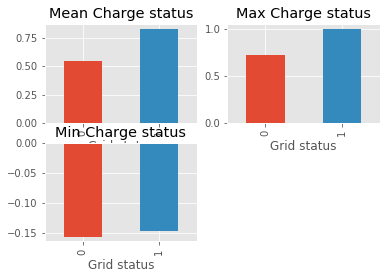

In [63]:
pyplot.subplot(2,2,1)
dmean.plot.bar(title='Mean Charge status')
pyplot.subplot(2,2,2)
dmax.plot.bar(title='Max Charge status')
pyplot.subplot(2,2)
dmin.plot.bar(title='Min Charge status')

In [29]:
pair2=pearsonr(data['SOH'],data['Equivalent cycle'])

In [30]:
print(pair2)

(-0.9842624478536391, 0.0)


<function matplotlib.pyplot.show(*args, **kw)>

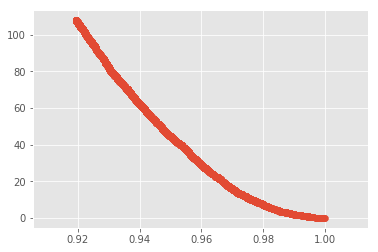

In [35]:
plt.style.use('ggplot')
pyplot.scatter(data['SOH'],data['Equivalent cycle'])
pyplot.show

In [36]:
pair3=pearsonr(data['SOC'],data['Temperature'])

In [37]:
print(pair3)

(-0.369040353266106, 0.0)


<function matplotlib.pyplot.show(*args, **kw)>

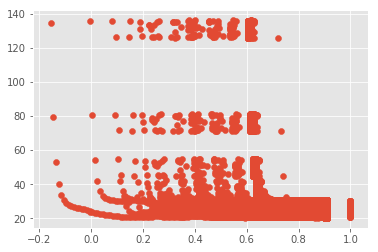

In [38]:
plt.style.use('ggplot')
pyplot.scatter(data['SOC'],data['Temperature'])
pyplot.show